In [127]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np

In [128]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('buy')
    plt.ylabel('cookie')
    plt.legend(['spam','ham'])
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=4):     #G
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

In [129]:
import pandas as pd
features = pd.DataFrame([[1,2],[2,1],[2,3],[3,2]])
labels = pd.Series([0,0,1,1])

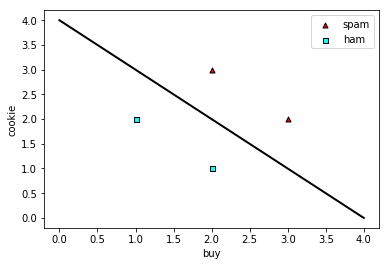

In [130]:
plot_points(features, labels)
draw_line(1,1,4)

In [131]:
def perceptron_trick(score_buy, score_cookie, threshold, num_buy, num_cookie, learning_rate, label):
    if score_buy*num_buy + score_cookie*num_cookie >= threshold:
        prediction = 1
    else:
        prediction = 0
    if label != prediction:
        if prediction == 1:
            score_buy -= learning_rate*num_buy
            score_cookie -= learning_rate*score_cookie
            threshold += learning_rate
    if prediction == 0:
            score_buy += learning_rate*num_buy
            score_cookie += learning_rate*score_cookie
            threshold -= learning_rate
    return score_buy, score_cookie, threshold

In [132]:
def perceptron(features, labels, learning_rate=0.01, epochs = 1000):
    score_buy = 1
    score_cookie = 1
    threshold = 1
    for i in range(epochs):
        draw_line(score_cookie, score_buy, threshold)
        i = random.randint(len(features))
        num_buy, num_cookie = features.loc[i]
        label = labels[i]
        score_buy, score_cookie, threshold = perceptron_trick(score_buy,     #E
                                                              score_cookie,
                                                              threshold,
                                                              num_buy,
                                                              num_cookie,
                                                              learning_rate,
                                                              label)
    draw_line(score_cookie, score_buy, threshold, 'black')
    plot_points(features, labels)
    print('Score Buy:', score_buy)
    print('Score Cookie:', score_cookie)
    print('Threshold:', threshold)
    return score_cookie, score_buy, threshold

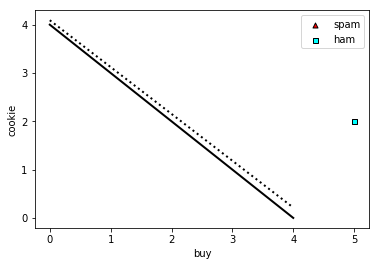

In [133]:
plot_points([[5,2]], [0])
draw_line(1,1,4, linestyle = 'solid')
draw_line(0.95, 0.98, 4.01, linestyle = 'dotted')

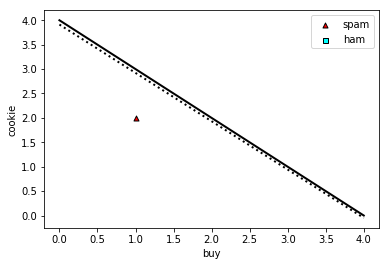

In [134]:
plot_points([[1,2]], [1])
draw_line(1,1,4, linestyle = 'solid')
draw_line(1.01, 1.02, 3.99, linestyle = 'dotted')

In [135]:
def perceptron_trick(score_buy, score_cookie, threshold, num_buy, num_cookie, learning_rate, label):
    if score_buy*num_buy + score_cookie*num_cookie >= threshold:    #A
        prediction = 1
    else:
        prediction = 0
    if label != prediction:     #B
        if prediction == 1:    #C
            score_buy -= learning_rate*num_buy
            score_cookie -= learning_rate*score_cookie
            threshold += learning_rate
    if prediction == 0:    #D
        score_buy += learning_rate*num_buy
        score_cookie += learning_rate*score_cookie
        threshold -= learning_rate
    return score_buy, score_cookie, threshold    #E


In [138]:
from numpy import random #A
random.seed(0)

def perceptron(features, labels, learning_rate=0.01, epochs = 1000):

    score_buy = 1    #B
    score_cookie = 1
    threshold = 1
    plot_points(features, labels)
    draw_line(score_cookie, score_buy, threshold, linewidth = 1.0, linestyle='dotted', color='black')    #C
    
    for i in range(epochs):     #D
        draw_line(score_cookie, score_buy, threshold, linewidth = 0.1, linestyle='dotted', color='grey')
        i = random.randint(len(features))     #E
        num_buy, num_cookie = features.loc[i]
        label = labels[i]
        score_buy, score_cookie, threshold = perceptron_trick(score_buy,     #F
                                                              score_cookie,
                                                              threshold,
                                                              num_buy,
                                                              num_cookie,
                                                              learning_rate,
                                                              label)
    draw_line(score_cookie, score_buy, threshold, linewidth=0.5, color='black')
    print('Score Buy:', score_buy)     #G
    print('Score Cookie:', score_cookie)
    print('Threshold:', threshold)
    return score_cookie, score_buy, threshold     #I

('Score Buy:', 0.5299999999999996)
('Score Cookie:', 0.535035985738935)
('Threshold:', 1.6000000000000005)


(0.535035985738935, 0.5299999999999996, 1.6000000000000005)

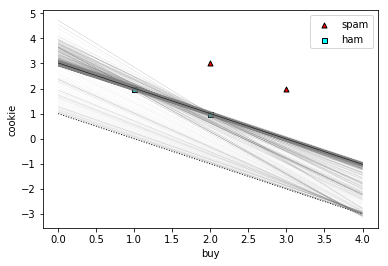

In [139]:
perceptron(features, labels)